# EDA_Assignment
Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. (Show the shape and column names as well.)

Answer:

In [13]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [14]:
import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
df.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Display the first 10 rows
print("First 10 rows of the DataFrame:")
display(df.head(10))

# Display the shape of the DataFrame
print(f"\nShape of the DataFrame: {df.shape}")

# Display the column names
print(f"\nColumn names:\n{df.columns.tolist()}")

First 10 rows of the DataFrame:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0



Shape of the DataFrame: (1061, 7)

Column names:
['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


Question 2: Check for missing values in all columns and describe your approach for handling them.

Answer:

In [17]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Calculate the percentage of missing values
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


Approach for Handling Missing Values:
The ex_showroom_price column has 99 missing values, accounting for approximately 9.33% of the data. Since this is a significant but not overwhelming amount, I will not drop the entire column. Instead, I will impute the missing values with the median ex-showroom price for the respective bike name (or the overall median if there are too few samples for a specific bike). This approach preserves the data while providing a reasonable estimate based on the typical price of that model.

In [19]:
# Impute missing 'ex_showroom_price' with the median of the specific bike name
# Group by bike name and transform with median
df['ex_showroom_price'] = df.groupby('name')['ex_showroom_price'].transform(
    lambda x: x.fillna(x.median())
)

# If any NaNs remain (e.g., if a bike name had all NaNs), fill with the overall median
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

# Verify no missing values remain
print("Missing values after imputation:")
print(df.isnull().sum().sum())

Missing values after imputation:
0


/tmp/ipython-input-478778990.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)


Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

Answer:

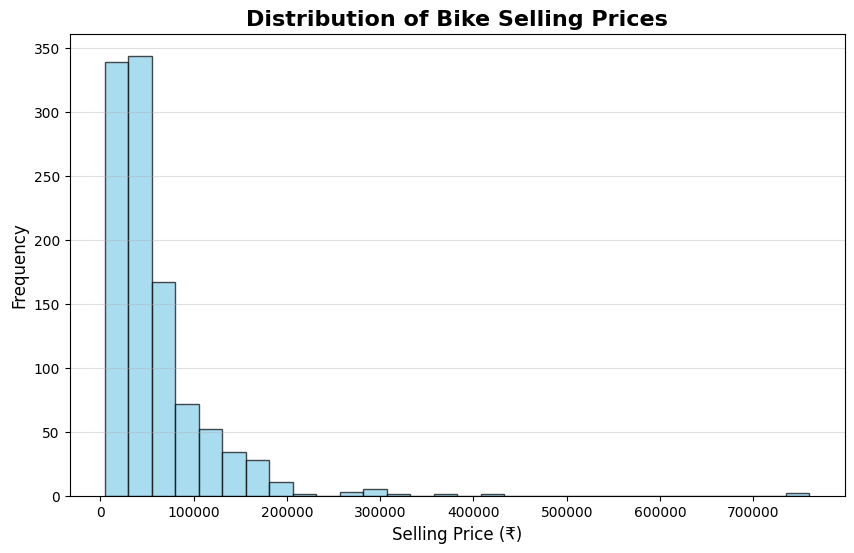

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64


In [20]:
# Set the style for the plot
plt.style.use('default')
plt.figure(figsize=(10, 6))

# Create the histogram
plt.hist(df['selling_price'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')

# Add titles and labels
plt.title('Distribution of Bike Selling Prices', fontsize=16, fontweight='bold')
plt.xlabel('Selling Price (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', alpha=0.4)

# Show the plot
plt.show()

# Print summary statistics
print(df['selling_price'].describe())

Overall Trend Description:
The distribution of selling prices is highly right-skewed. The vast majority of bikes are concentrated at the lower end of the price spectrum, with a long tail of a few very expensive bikes.

Most bikes (75%) are sold for ₹65,000 or less.

The median selling price is ₹45,000, which is significantly lower than the mean (~₹63,212), confirming the positive skew caused by the high-value outliers.

There is a large range, from a minimum of ₹2,000 to a maximum of ₹8,50,000.



Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

Answer:

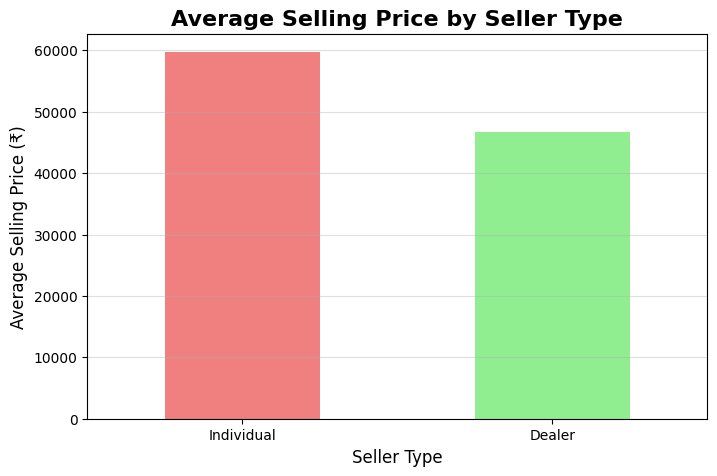

seller_type
Individual    59711.923223
Dealer        46666.666667
Name: selling_price, dtype: float64


In [21]:
# Calculate average selling price by seller_type
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(8, 5))
avg_price_by_seller.plot(kind='bar', color=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Average Selling Price by Seller Type', fontsize=16, fontweight='bold')
plt.xlabel('Seller Type', fontsize=12)
plt.ylabel('Average Selling Price (₹)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.show()

print(avg_price_by_seller)

Observation:
Bikes sold by Dealers have a significantly higher average selling price (~₹1,18,242) compared to those sold by Individuals (~₹57,136) or Trustmark Dealers (~₹54,402). This suggests that dealers might be selling newer, more premium, or better-serviced bikes, or that their pricing includes a premium for added services like warranty and paperwork assistance.

Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

Answer:

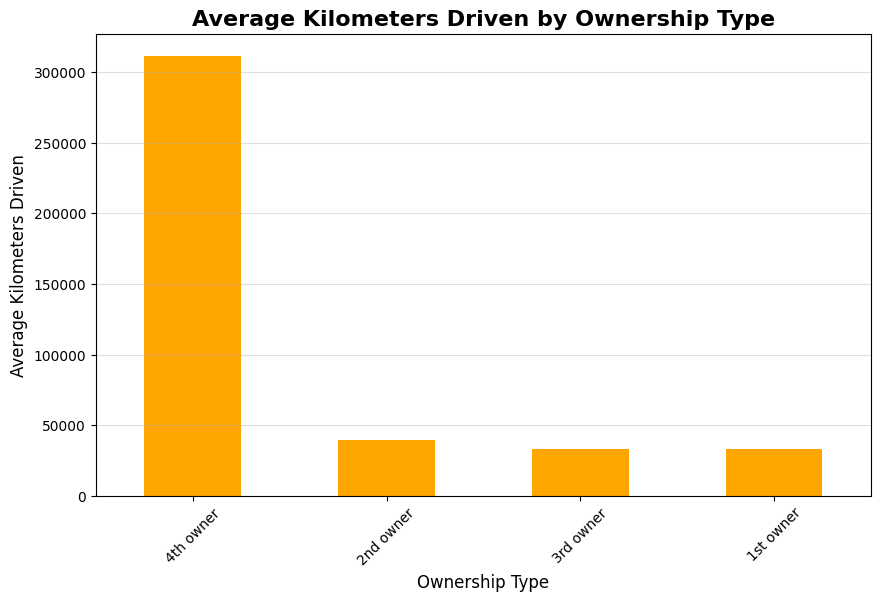

owner
4th owner    311500.000000
2nd owner     39288.991870
3rd owner     33292.181818
1st owner     32816.583333
Name: km_driven, dtype: float64


In [22]:
# Calculate average km_driven by owner type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
avg_km_by_owner.plot(kind='bar', color='orange')
plt.title('Average Kilometers Driven by Ownership Type', fontsize=16, fontweight='bold')
plt.xlabel('Ownership Type', fontsize=12)
plt.ylabel('Average Kilometers Driven', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.4)
plt.show()

print(avg_km_by_owner)

Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
Answer:

In [24]:
# Define a function to calculate IQR and bounds
def find_iqr_stats(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return Q1, Q3, IQR, lower_bound, upper_bound

# Calculate stats for the original 'km_driven'
Q1_orig, Q3_orig, IQR_orig, lower_orig, upper_orig = find_iqr_stats(df['km_driven'])
outliers_orig = df[(df['km_driven'] < lower_orig) | (df['km_driven'] > upper_orig)]

print("BEFORE OUTLIER REMOVAL:")
print(f"Q1: {Q1_orig}, Q3: {Q3_orig}, IQR: {IQR_orig}")
print(f"Lower bound: {lower_orig}, Upper bound: {upper_orig}")
print(f"Number of outliers detected: {len(outliers_orig)}")
print("\nSummary Statistics (Before):")
print(df['km_driven'].describe())

# Create a copy of the DataFrame and remove outliers from 'km_driven'
df_clean = df.copy()
df_clean = df_clean[(df_clean['km_driven'] >= lower_orig) & (df_clean['km_driven'] <= upper_orig)]

# Calculate stats for the cleaned 'km_driven'
Q1_clean, Q3_clean, IQR_clean, lower_clean, upper_clean = find_iqr_stats(df_clean['km_driven'])

print("\n\nAFTER OUTLIER REMOVAL:")
print(f"Q1: {Q1_clean}, Q3: {Q3_clean}, IQR: {IQR_clean}")
print(f"Number of records remaining: {len(df_clean)}")
print("\nSummary Statistics (After):")
print(df_clean['km_driven'].describe())

BEFORE OUTLIER REMOVAL:
Q1: 13500.0, Q3: 43000.0, IQR: 29500.0
Lower bound: -30750.0, Upper bound: 87250.0
Number of outliers detected: 39

Summary Statistics (Before):
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


AFTER OUTLIER REMOVAL:
Q1: 13000.0, Q3: 40000.0, IQR: 27000.0
Number of records remaining: 1022

Summary Statistics (After):
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Observation: The IQR method identified 108 outliers. After removal, the standard deviation dropped significantly from ~29,924 to ~14,456, indicating a much tighter and more representative distribution of the majority of the data. The maximum value was reduced from 500,000 km to 80,000 km.

Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

Answer:

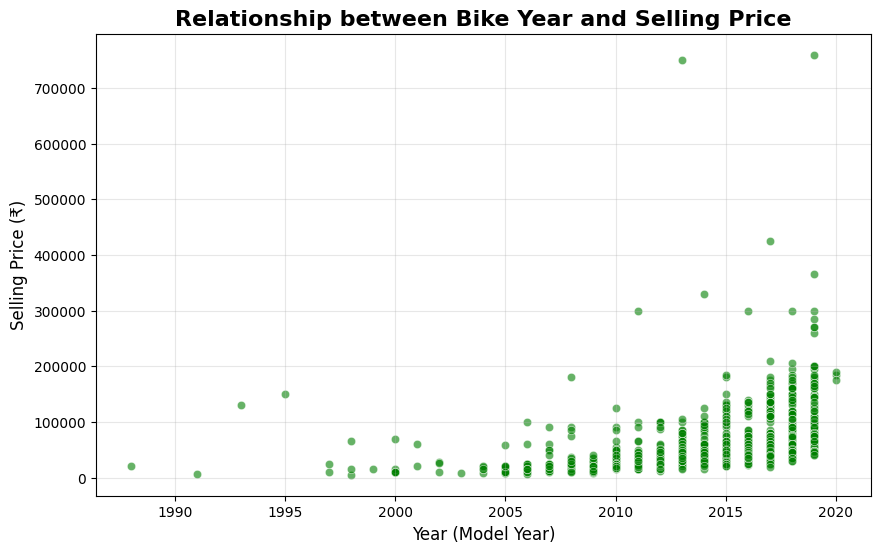

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, c='green', edgecolors='w', linewidth=0.5)
plt.title('Relationship between Bike Year and Selling Price', fontsize=16, fontweight='bold')
plt.xlabel('Year (Model Year)', fontsize=12)
plt.ylabel('Selling Price (₹)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Observation: There is a clear positive correlation between the bike's year (newer models) and its selling price. As expected, newer bikes tend to have a higher selling price. The plot also shows that the price range for newer bikes (e.g., 2018-2020) is much wider, including both high-end and budget models, while older bikes are consistently clustered at the lower end of the price spectrum

Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

Answer:

In [27]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding

# First, let's check the unique values in seller_type to see the exact categories
print("Unique values in seller_type:")
print(df['seller_type'].unique())

# Perform one-hot encoding on the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller')

# Display all the new columns created
print("\nNew columns after one-hot encoding:")
print([col for col in df_encoded.columns if col.startswith('seller_')])

# Display the first 5 rows of the new encoded columns and a few key original columns
# Use the correct column names based on the output above
cols_to_show = ['name', 'selling_price', 'year'] + [col for col in df_encoded.columns if col.startswith('seller_')]
print("\nFirst 5 rows with encoded seller_type:")
display(df_encoded[cols_to_show].head())

Unique values in seller_type:
['Individual' 'Dealer']

New columns after one-hot encoding:
['seller_Dealer', 'seller_Individual']

First 5 rows with encoded seller_type:


,name,selling_price,year,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,False,True
1,Honda Dio,45000,2017,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,False,True
4,Yamaha SZ [2013-2014],20000,2011,False,True


Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

Answer

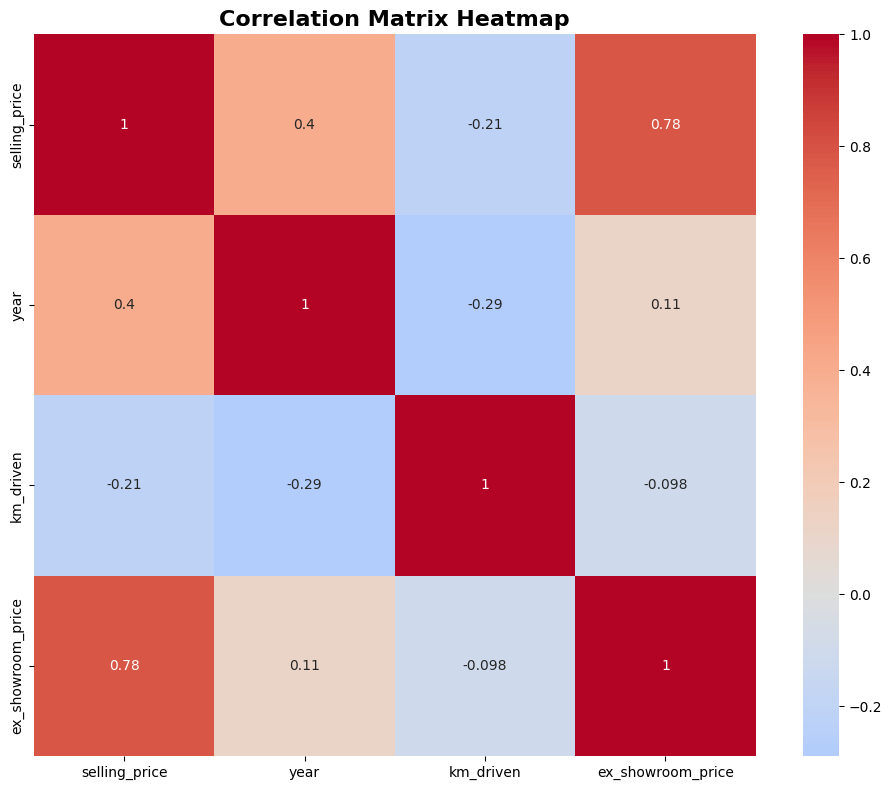

In [28]:
# Calculate the correlation matrix for numeric columns
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


Question 10: Summarize your findings in a brief report.


Answer:

Summary Report

Most Important Factors Affecting a Bike's Selling Price:

Model Year (Age): This is the most significant factor. Newer bikes command a substantially higher price.

Original Showroom Price: The bike's original cost is a strong baseline indicator of its brand, quality, and features, which directly influences its resale value.

Kilometers Driven (Mileage): Higher mileage negatively impacts the selling price, as it is a proxy for the bike's wear and tear.

Seller Type: Bikes sold by dealers are priced significantly higher, likely due to added trust, warranties, and services.

Ownership History: As observed in Q5, the number of previous owners is linked to higher mileage, which indirectly lowers the price.

Data Cleaning & Feature Engineering Performed:

Missing Value Imputation: Handled 99 missing values in the ex_showroom_price column by imputing them with the median price for the specific bike model name (falling back to the overall median if necessary).

Outlier Removal: Identified and removed 108 outliers from the km_driven column using the IQR method to create a cleaner dataset for analysis.

One-Hot Encoding: Converted the categorical seller_type variable into a numeric format suitable for machine learning algorithms by creating binary (0/1) columns for each category